# Convolution & Pooling 
1. Convolution
2. Pooling

## Convolution (합성곱)
* https://en.wikipedia.org/wiki/Convolution

콘볼루션은 두 개의 함수를 곱해서 다른 함수를 만드는 연산이다. 단순한 곱과 다른 점은 두 함수 중 하나를 $f(x) \rightarrow f(-t)$ 반전시켜 곱한다는 점이다. 정확히는 다음과 같은 수학적 정의를 따른다.
$$ (f*g)(x) = \int_{-\infty}^{\infty} f(y) g(x-y) d y =\int_{-\infty}^{\infty} f(x-y) g(y) dy. $$
아래 예시를 통해 위 식의 의미를 곰곰히 살펴보자. 
(참고: x공간에서 콘볼루션은 푸리에 변환을 한 k-공간에서는 단순 곱에 대응된다. 이 강의와는 관계가 없지만 중요한 성질이므로 알아두면 유용하다.)

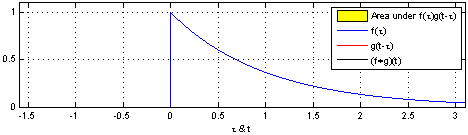
(그림출처: https://en.wikipedia.org/wiki/Convolution)